 # EMPLOYEE ACCESS PREDICTION

# ECorp

### Company Introduction

Your client for this project is a multinational technology company.

ECorp is an American multinational technology company that focuses on e-commerce, cloud computing, digital streaming, and artificial intelligence.
They are spread across the globe with hundreds of thousands of employees in these domains.
When an employee at any company starts working, they first need to obtain the resource access necessary to fulfill their role.
Employees passing certain criteria regarding their primary and secondary roles are granted access to the requested resources.
This efficient system has helped the company maintain background checks of its employees and usage of allocated resources.

### Current Scenario
A group of employees has been invited to test the automated system. An auto-access model seeks to minimize the human involvement required to grant or revoke employee access.

**The current process suffers from the following problems:**

- If an employee discovers that they need access to certain resources, they are supposed to contact a knowledgeable supervisor.
- The supervisor takes time to manually grant the needed access to the requesting employee.
- As employees move throughout a company, this access discovery/recovery cycle wastes a non-trivial amount of time and money.

The company has hired you as a data science consultant. They want to **automate** the process of approving or revoking **access** to a resource according to their role in the company.

**Your Role**

You are given a dataset containing the **ACTION** (ground truth), **RESOURCE**, and information about the employee's role at the time of approval.

The model will take an employee's **role information** and the requested resource in the form of a **resource code** and will determine if an employee should be given **access** or not.

Your task is to build a **binary-class classification model** using the dataset.

Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

**Project Deliverables**

- Deliverable: **Employee Access Classification.**
- Machine Learning Task: **Classification**
- Target Variable: **ACTION**
- Win Condition: **N/A (best possible model)**

**Evaluation Metric**

The model evaluation will be based on the **Accuracy Score.**

In [45]:
# Importing Libraries 

import pandas as pd                                             # Importing Pandas for Data Ananlysis and Manipulation                      
from pandas_profiling import ProfileReport                      # for generating profile report    
pd.set_option('display.max_columns', None)                      # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                         # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                  # Removing restriction over chained assignments operations
import numpy as np                                              # For high-level mathmematical functions     
from scipy.stats import randint as sp_randint                   # For initiallizing Randon Integer   
import matplotlib.pyplot as plt                                 # For plotting graphs    
import seaborn as sns                                           # For interactive data vizualization    
%matplotlib inline  
import catboost                                                 # For classification 

import sklearn.metrics                                          # For assessing qualtiy of predections
from sklearn.preprocessing import StandardScaler                # To standardize features by removing the mean and scaling to unit variance.   
from sklearn.model_selection import RandomizedSearchCV          # For random combinations of the hyperparameters ,used to find the best solution for the built model.    
from sklearn.metrics import classification_report               # To generate classification report    
from sklearn.metrics import plot_confusion_matrix               # For plotting confusion matrix, to define the performance of classification algorithm   
#import pydotplus                                               # for generating pydot file 
from IPython.display import Image                               # For generating image using pydot file    

from sklearn.metrics import accuracy_score                      # For calcuating the accuracy of the model    
from sklearn.metrics import precision_score                     # For calculating the precision of the model    
from sklearn.metrics import recall_score                        # For calculating the recall of the model   
from sklearn.metrics import precision_recall_curve              # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                    # For defining performance of classification algorithm     
from sklearn.metrics import f1_score                            # For measuring a model's accuracy on dataset.    
from sklearn.metrics import roc_curve                           # For showing the performance of classification model at all classification thresholds.    
from sklearn.metrics import plot_roc_curve                      # For plotting ROC curve
from sklearn.model_selection import train_test_split            # For splitting the data into training and testing data set     
from sklearn.linear_model import LogisticRegression             # For implementing Logistic regression    
from xgboost import XGBClassifier                               # For implementing XGBoost classifier 
from sklearn.metrics import accuracy_score, roc_auc_score
import warnings                                                 # For disabling warings    
warnings.filterwarnings("ignore")

**Loading the datasets**  

We have train and test data sets 

In [4]:


train = pd.read_csv("C:\\Users\\roshn\\Downloads\\Project-6-Classification-Employee-Access-Prediction\\ea_train.csv", index_col='ID')
test = pd.read_csv("C:\\Users\\roshn\\Downloads\\Project-6-Classification-Employee-Access-Prediction\\ea_test.csv", index_col='ID')

In [50]:
# displays first five rows, easy to test if the data set has the right type of data
train.head()


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
ID,,,,,,,,,,
2270,75078,255037,118315,118316,118202,118784,262095,290919,118786,1
696,79323,3120,117961,118300,120312,120313,120314,118424,120315,1
13514,34958,8243,118555,118178,118320,117905,117906,290919,117908,1
13400,39371,7520,117961,118343,124725,117905,240983,290919,117908,1
6703,39330,17290,117961,118386,118522,117905,117906,290919,117908,1


In [51]:
test.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ID,,,,,,,,,
18245,37793,81744,117902,117903,118783,118451,130134,118453,118454
9226,40309,1541,117961,118225,123173,119093,123174,119095,119096
27195,27356,205,117961,118386,118746,118784,147114,290919,118786
6478,5173,8229,117961,118300,121305,119351,149246,3130,119353
4813,77207,51791,117961,119256,120943,118995,280788,292795,118997


### Data Acquitision

|Column Name	| Description |
|-----------------------|------------------|
| RESOURCE	| An ID for each resource.|
| MGR_ID	| The EMPLOYEE ID of the manager of the current EMPLOYEE ID record; an employee may have only one manager at a time.|
| ROLE_ROLLUP_1	| Company role grouping category id 1 (e.g. US Engineering).|
| ROLE_ROLLUP_2	 | Company role grouping category id 2 (e.g. US Retail).|
| ROLE_DEPTNAME	| Company role department description (e.g. Retail). |
| ROLE_TITLE	| Company role business title description (e.g. Senior Engineering Retail Manager) |
| ROLE_FAMILY_DESC	| Company role family extended description (e.g. Retail Manager, Software Engineering) |
| ROLE_FAMILY	| Company role family description (e.g. Retail Manager). |
| ROLE_CODE |	Company role code; this code is unique to each role (e.g. Manager)|
| ID	| ID of the Employee | 
| ACTION | 	ACTION is 1 if the resource was approved, 0 if the resource was no.|

**Action** is our **target column.**

In [52]:
#dimensions of data set
train.shape
print('Shape of train dataset is',train.shape)
test.shape
print('Shape of train dataset is',test.shape)

Shape of train dataset is (24576, 10)
Shape of train dataset is (8193, 9)


In [53]:
#checking missing values in train data set
any(train.isna().sum())

False

In [54]:
#checking missing values in test data set
any(test.isna().sum())

False

In [55]:
#checking duplicate values
any(train.duplicated())

False

In [56]:

#checking duplicate values
any(test.duplicated())

False

In [57]:
# Basic Statistical insight on the data set 
train.describe()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
count,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000,24576.000000
mean,42881.130371,25893.693278,116955.370443,118260.892741,118854.659098,125661.492594,169860.284505,183598.044556,119765.312378,0.941895
std,34262.362668,35746.796709,10950.867471,4841.345712,18639.574571,30491.343035,69329.221486,100563.091506,5559.507074,0.233948
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000,0.000000
25%,20299.000000,4564.000000,117961.000000,118102.000000,118391.000000,118274.000000,117906.000000,118363.000000,118209.000000,1.000000
50%,35210.000000,13441.000000,117961.000000,118300.000000,118910.000000,118568.000000,128628.000000,119095.000000,118570.000000,1.000000
75%,74189.250000,41786.000000,117961.000000,118386.000000,120428.000000,120006.000000,233714.000000,290919.000000,119353.000000,1.000000
max,312153.000000,311696.000000,311178.000000,286791.000000,286792.000000,311867.000000,311867.000000,308574.000000,270691.000000,1.000000


In [58]:
test.describe()


,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
count,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000,8193.000000
mean,43052.257903,26274.717198,116944.400830,118424.599414,119087.121079,126680.039546,171132.508605,184019.463322,119861.774564
std,33908.886990,36466.978203,10647.139859,3540.439044,19895.419705,32607.026621,70042.923669,100269.513113,6411.225301
min,0.000000,25.000000,4292.000000,23779.000000,4674.000000,117879.000000,4673.000000,3130.000000,117880.000000
25%,20299.000000,4576.000000,117961.000000,118102.000000,118395.000000,118278.000000,117913.000000,118363.000000,118261.000000
50%,35531.000000,13781.000000,117961.000000,118300.000000,118979.000000,118568.000000,128942.000000,118960.000000,118570.000000
75%,74166.000000,44022.000000,117961.000000,118386.000000,120551.000000,120006.000000,237245.000000,290919.000000,119194.000000
max,312153.000000,311696.000000,247952.000000,185842.000000,277693.000000,311867.000000,311867.000000,308574.000000,258436.000000


In [59]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 24576 entries, 2270 to 15795
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          24576 non-null  int64
 1   MGR_ID            24576 non-null  int64
 2   ROLE_ROLLUP_1     24576 non-null  int64
 3   ROLE_ROLLUP_2     24576 non-null  int64
 4   ROLE_DEPTNAME     24576 non-null  int64
 5   ROLE_TITLE        24576 non-null  int64
 6   ROLE_FAMILY_DESC  24576 non-null  int64
 7   ROLE_FAMILY       24576 non-null  int64
 8   ROLE_CODE         24576 non-null  int64
 9   ACTION            24576 non-null  int64
dtypes: int64(10)
memory usage: 2.1 MB


In [60]:
test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8193 entries, 18245 to 20494
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   RESOURCE          8193 non-null   int64
 1   MGR_ID            8193 non-null   int64
 2   ROLE_ROLLUP_1     8193 non-null   int64
 3   ROLE_ROLLUP_2     8193 non-null   int64
 4   ROLE_DEPTNAME     8193 non-null   int64
 5   ROLE_TITLE        8193 non-null   int64
 6   ROLE_FAMILY_DESC  8193 non-null   int64
 7   ROLE_FAMILY       8193 non-null   int64
 8   ROLE_CODE         8193 non-null   int64
dtypes: int64(9)
memory usage: 640.1 KB


In [61]:
#getting the names of columns
train.columns

Index(['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME',
       'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE', 'ACTION'],
      dtype='object')

### Data Preprocessing
Pandas-profiling generates profile reports from a pandas DataFrame. The pandas df.describe() function is handy yet a little basic for exploratory data analysis. pandas-profiling extends pandas DataFrame with df.profile_report(), which automatically generates a standardized univariate and multivariate report for data understanding.

In [62]:
profile = ProfileReport(df=train)
profile.to_file(output_file='Employee_access train dataset report.html')
print('Done!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Done!


### Exploratory Data Analysis
EDA is an approach to analyzing datasets to summarize their main characteristics, often with visual methods.

EDA is used for seeing what the data can tell us before the modeling task.

Exploratory data analysis is generally cross-classified in two ways.

First, each method is either **non-graphical** or **graphical.** And second, each method is either univariate or multivariate (usually just bivariate).

**Univariate Analysis**

Univariate analysis is the simplest form of data analysis, where the data being analyzed consists of only one variable. Since it’s a single variable, it doesn’t deal with causes or relationships. The main purpose of the univariate analysis is to describe the data and find patterns that exist within it. Visualizations used for performing univariate analysis:

- Line Chart
- Histogram

**Multivariate analysis**

Multivariate data analysis refers to any statistical technique used to analyze data that arises from more than one variable. This model’s more realistic applications, where each situation, product, or decision involves more than a single variable. Visualizations used for performing multivariate analysis:

- Scatter Plot
- Heatmap

In [64]:
train['ACTION'].value_counts()


1    23148
0     1428
Name: ACTION, dtype: int64

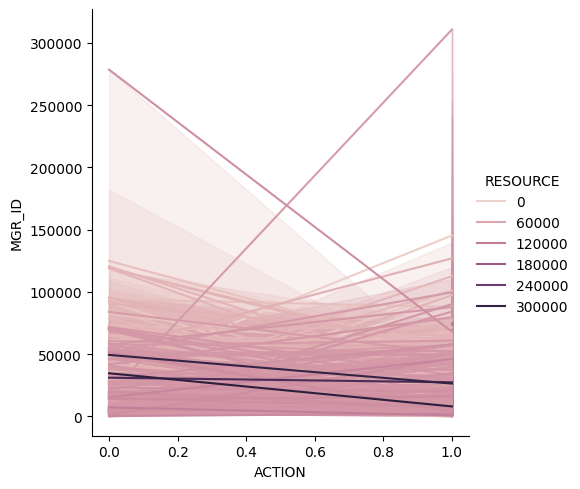

In [10]:
sns.relplot(data=train, x="ACTION", y="MGR_ID", hue="RESOURCE", kind="line")


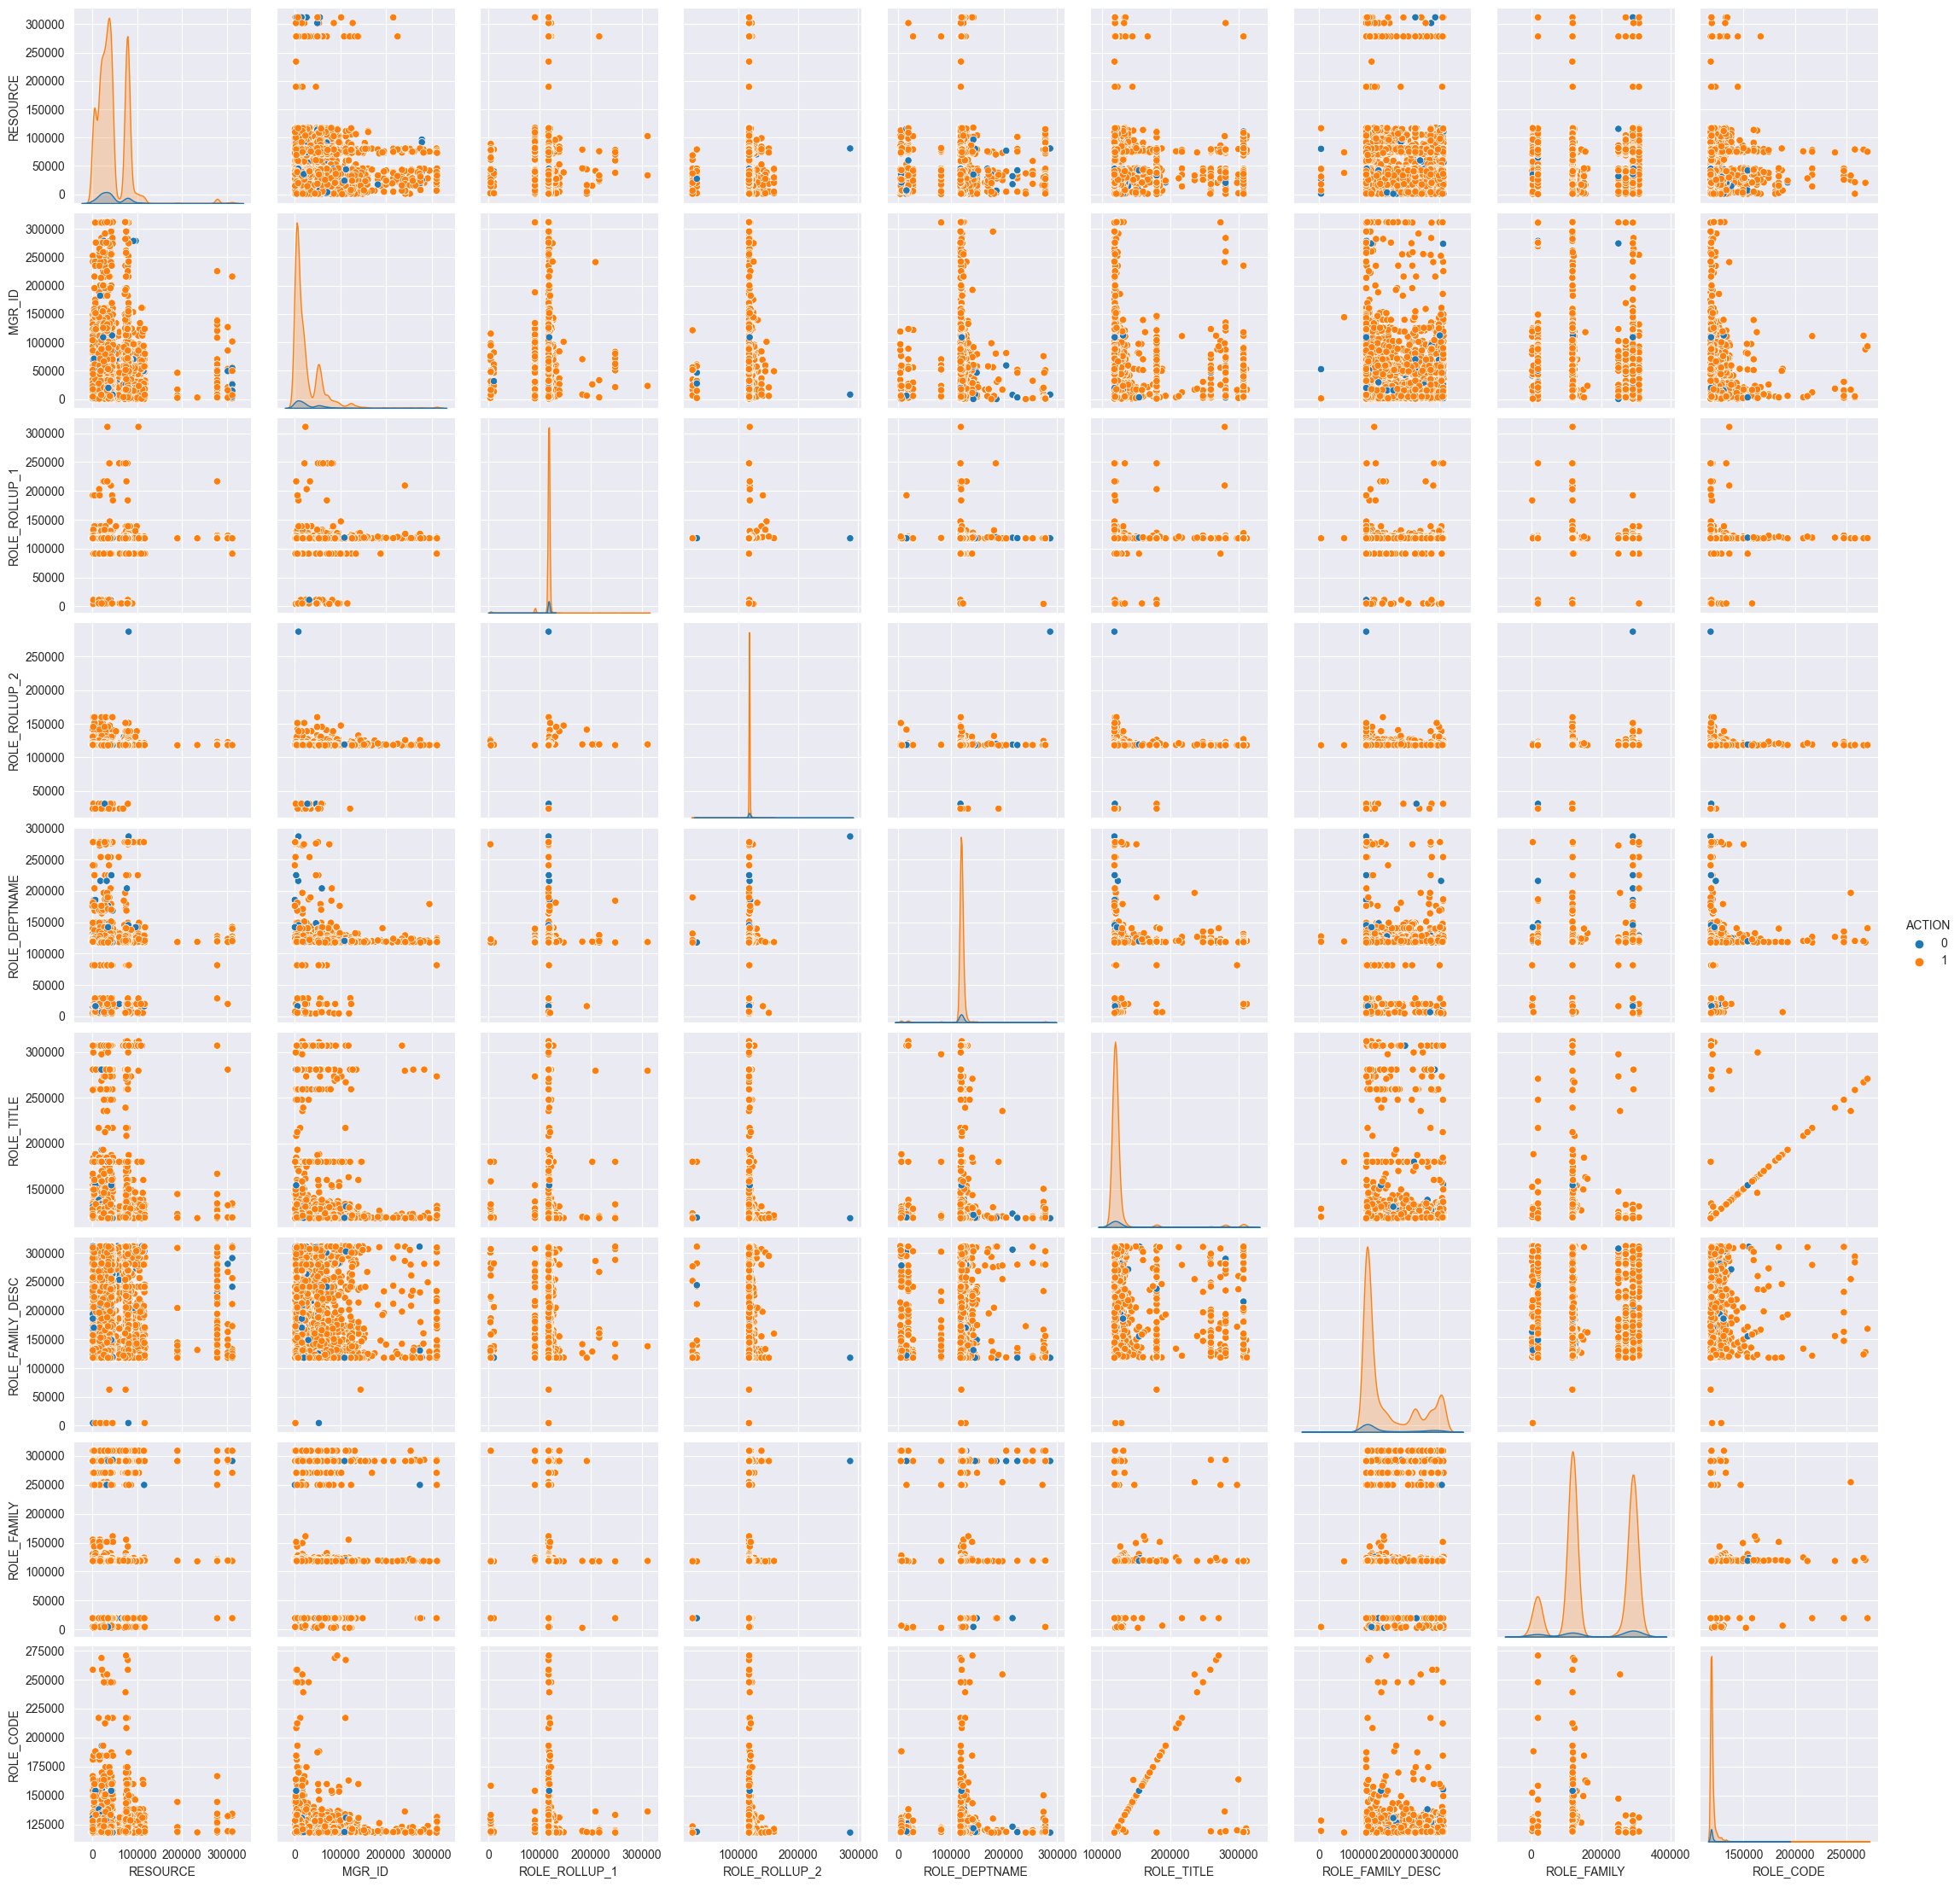

In [19]:
sns.set_style("darkgrid");
sns.pairplot(train, hue="ACTION", size=2.5);
plt.show()

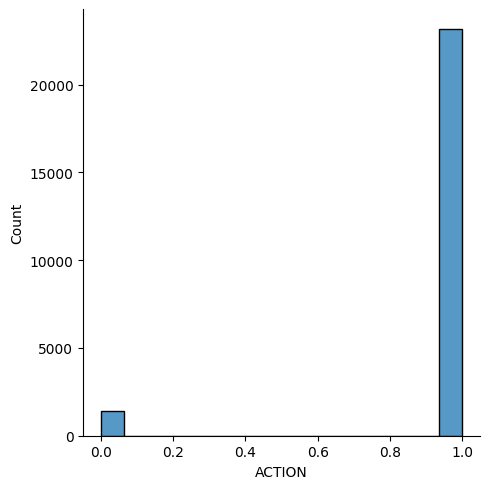

In [8]:
sns.displot(train, x="ACTION")


In [20]:
train.corr()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
RESOURCE,1.000000,0.010474,-0.001956,0.014442,0.023536,0.003053,0.017024,0.028848,0.008547,0.004709
MGR_ID,0.010474,1.000000,-0.008580,-0.002313,-0.009085,0.022017,-0.016599,-0.119074,-0.000415,-0.005475
ROLE_ROLLUP_1,-0.001956,-0.008580,1.000000,0.029774,-0.010653,0.013483,-0.003518,0.022586,-0.023343,-0.010529
ROLE_ROLLUP_2,0.014442,-0.002313,0.029774,1.000000,-0.002915,0.009828,0.018436,0.074391,0.015300,0.003042
ROLE_DEPTNAME,0.023536,-0.009085,-0.010653,-0.002915,1.000000,-0.006572,-0.007259,0.025275,0.014705,0.003436
ROLE_TITLE,0.003053,0.022017,0.013483,0.009828,-0.006572,1.000000,0.168525,-0.017607,0.148421,-0.010021
ROLE_FAMILY_DESC,0.017024,-0.016599,-0.003518,0.018436,-0.007259,0.168525,1.000000,-0.181645,0.095046,0.009278
ROLE_FAMILY,0.028848,-0.119074,0.022586,0.074391,0.025275,-0.017607,-0.181645,1.000000,-0.151298,0.003252
ROLE_CODE,0.008547,-0.000415,-0.023343,0.015300,0.014705,0.148421,0.095046,-0.151298,1.000000,0.015459
ACTION,0.004709,-0.005475,-0.010529,0.003042,0.003436,-0.010021,0.009278,0.003252,0.015459,1.000000


Correlation Matrix is:                   RESOURCE    MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  \
RESOURCE          1.000000  0.010474      -0.001956       0.014442   
MGR_ID            0.010474  1.000000      -0.008580      -0.002313   
ROLE_ROLLUP_1    -0.001956 -0.008580       1.000000       0.029774   
ROLE_ROLLUP_2     0.014442 -0.002313       0.029774       1.000000   
ROLE_DEPTNAME     0.023536 -0.009085      -0.010653      -0.002915   
ROLE_TITLE        0.003053  0.022017       0.013483       0.009828   
ROLE_FAMILY_DESC  0.017024 -0.016599      -0.003518       0.018436   
ROLE_FAMILY       0.028848 -0.119074       0.022586       0.074391   
ROLE_CODE         0.008547 -0.000415      -0.023343       0.015300   
ACTION            0.004709 -0.005475      -0.010529       0.003042   

                  ROLE_DEPTNAME  ROLE_TITLE  ROLE_FAMILY_DESC  ROLE_FAMILY  \
RESOURCE               0.023536    0.003053          0.017024     0.028848   
MGR_ID                -0.009085    0.022017       

Text(0.5, 1.0, 'Correlation between Numerical features and target variable')

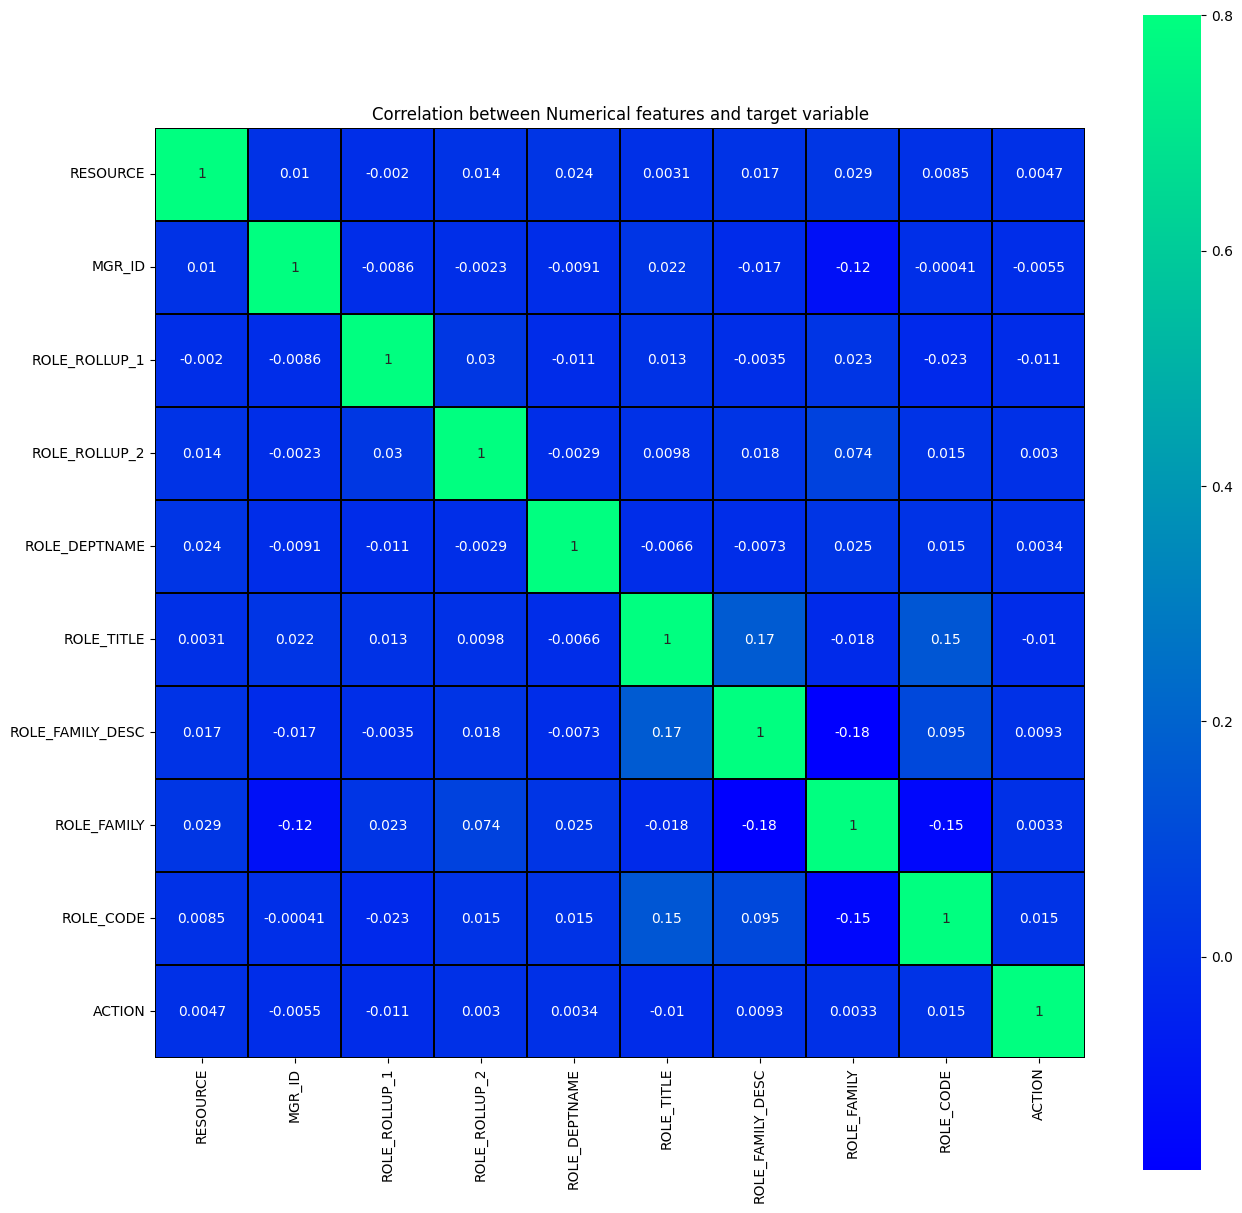

In [29]:
corr = train.corr(method='pearson') #using pearson correlation coeffiecnt as we have raw data value
print('Correlation Matrix is:', corr)
plt.figure(figsize=(15,15))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='winter',linecolor ='black') #plotting the heatmap for correlation

plt.title('Correlation between Numerical features and target variable')

In [30]:
train.cov() #for checking the covarince between the features

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE,ACTION
RESOURCE,1.173909e+09,1.282869e+07,-7.338987e+05,2.395538e+06,1.503106e+07,3.189688e+06,4.043798e+07,9.939667e+07,1.628096e+06,37.742632
MGR_ID,1.282869e+07,1.277833e+09,-3.358817e+06,-4.002672e+05,-6.053386e+06,2.399805e+07,-4.113773e+07,-4.280478e+08,-8.239479e+04,-45.788728
ROLE_ROLLUP_1,-7.338987e+05,-3.358817e+06,1.199215e+08,1.578535e+06,-2.174395e+06,4.501991e+06,-2.670726e+06,2.487284e+07,-1.421132e+06,-26.974202
ROLE_ROLLUP_2,2.395538e+06,-4.002672e+05,1.578535e+06,2.343863e+07,-2.630613e+05,1.450839e+06,6.188137e+06,3.621821e+07,4.118103e+05,3.445365
ROLE_DEPTNAME,1.503106e+07,-6.053386e+06,-2.174395e+06,-2.630613e+05,3.474337e+08,-3.735123e+06,-9.380221e+06,4.737621e+07,1.523846e+06,14.984911
ROLE_TITLE,3.189688e+06,2.399805e+07,4.501991e+06,1.450839e+06,-3.735123e+06,9.297220e+08,3.562521e+08,-5.398800e+07,2.515989e+07,-71.483360
ROLE_FAMILY_DESC,4.043798e+07,-4.113773e+07,-2.670726e+06,6.188137e+06,-9.380221e+06,3.562521e+08,4.806541e+09,-1.266422e+09,3.663409e+07,150.485627
ROLE_FAMILY,9.939667e+07,-4.280478e+08,2.487284e+07,3.621821e+07,4.737621e+07,-5.398800e+07,-1.266422e+09,1.011294e+10,-8.458783e+07,76.496424
ROLE_CODE,1.628096e+06,-8.239479e+04,-1.421132e+06,4.118103e+05,1.523846e+06,2.515989e+07,3.663409e+07,-8.458783e+07,3.090812e+07,20.106778
ACTION,3.774263e+01,-4.578873e+01,-2.697420e+01,3.445365e+00,1.498491e+01,-7.148336e+01,1.504856e+02,7.649642e+01,2.010678e+01,0.054731


### Observations

- ROLE_TITLE is highly correlated with ROLE_CODE
- ROLE_FAMILY_DESC is highly correlated with ROLE_TITLE and ROLE_CODE

### Data Preparation 

In [31]:
train['ACTION'].value_counts(normalize=True)


1    0.941895
0    0.058105
Name: ACTION, dtype: float64

In [32]:
train.nunique()


RESOURCE            6469
MGR_ID              3996
ROLE_ROLLUP_1        123
ROLE_ROLLUP_2        168
ROLE_DEPTNAME        440
ROLE_TITLE           331
ROLE_FAMILY_DESC    2183
ROLE_FAMILY           64
ROLE_CODE            331
ACTION                 2
dtype: int64

In [36]:
train_encoded=train.drop(['ACTION','RESOURCE'],axis=1)
y=train['ACTION']
print(train_encoded.shape,y.shape)

(24576, 8) (24576,)


### Model Evaluation 

In [37]:
# Splitting data into train and test sets with using  Test Data as 25%
X_train, X_test, y_train, y_test = train_test_split(train_encoded, y, test_size=0.25, random_state=42, stratify=y)

# Display the shape of train and test data
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)
X_train.info()
X_train.columns
X_train.head()

X_train shape:  (18432, 8)
y_train shape:  (18432,)
X_test shape:  (6144, 8)
y_test shape:  (6144,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18432 entries, 18150 to 20498
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   MGR_ID            18432 non-null  int64
 1   ROLE_ROLLUP_1     18432 non-null  int64
 2   ROLE_ROLLUP_2     18432 non-null  int64
 3   ROLE_DEPTNAME     18432 non-null  int64
 4   ROLE_TITLE        18432 non-null  int64
 5   ROLE_FAMILY_DESC  18432 non-null  int64
 6   ROLE_FAMILY       18432 non-null  int64
 7   ROLE_CODE         18432 non-null  int64
dtypes: int64(8)
memory usage: 1.3 MB


,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
ID,,,,,,,,
18150,28152,118315,118316,118317,118777,279443,308574,118779
13974,18018,117983,117984,117878,118568,292195,19721,118570
22537,1276,117902,117903,120171,120990,137612,118398,120992
23455,8520,117961,118386,119954,118318,168365,118205,118319
774,4498,117890,118102,117878,134118,211100,119788,134120


**Standard Scalaer**

- Standardize features by removing the mean and scaling to unit variance.
- Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.




In [71]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

SS = StandardScaler()    #defining standard scaler


X_train_ss = SS.fit_transform(X_train) #Fitting and transforming standard scaler to X_train
X_test_ss = SS.transform(X_test)  #Scaling and Transforming X_test data

**Logistic Regression**

A logistic regression model predicts a dependent data variable by analyzing the relationship between one or more existing independent variables.

**Accuracy**

Accuracy is the number of correctly predicted data points out of all the data points.

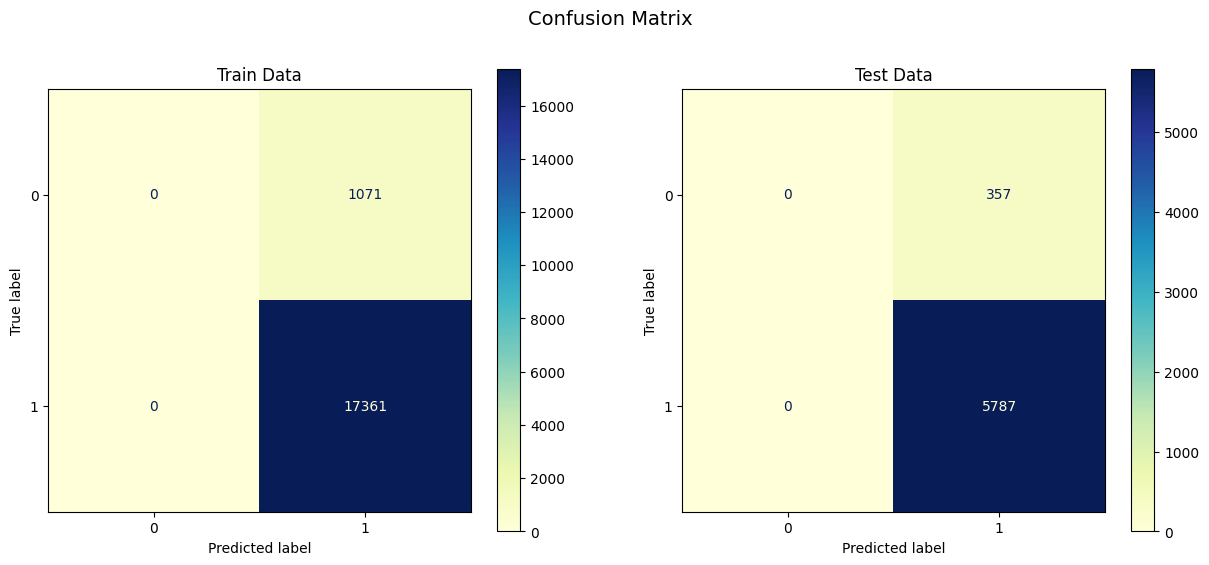

In [72]:
#  Logistic Regression
logreg = LogisticRegression() # Applying logistic regression
logreg.fit(X_train,y_train) # Fit the model according to the given training data.

# Predict train and test labels
y_train_pred_count = logreg.predict(X_train)
y_test_pred_count = logreg.predict(X_test)

# confusion maxtrix 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator=logreg, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=logreg, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()

In [73]:
print('Accuracy score for test data using logistic regression is:', accuracy_score(y_test,y_test_pred_count))


Accuracy score for test data using logistic regression is: 0.94189453125


In [74]:
# Generating classification report for Logistic Regression 
train_report = classification_report(y_train, y_train_pred_count)
test_report = classification_report(y_test, y_test_pred_count)
print('                    Train Data Report          ')
print(train_report)
print('                    Test  Data Report           ')
print(test_report)

                    Train Data Report          
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1071
           1       0.94      1.00      0.97     17361

    accuracy                           0.94     18432
   macro avg       0.47      0.50      0.49     18432
weighted avg       0.89      0.94      0.91     18432

                    Test  Data Report           
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       357
           1       0.94      1.00      0.97      5787

    accuracy                           0.94      6144
   macro avg       0.47      0.50      0.49      6144
weighted avg       0.89      0.94      0.91      6144



**Random Forest Classifier**

- Random Forest is a classifier that contains a number of **decision trees** on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset.
- The greater number of trees in the forest leads to **higher accuracy** and prevents the problem of overfitting.
- There should be some actual values in the feature variable of the dataset so that the classifier can predict accurate results rather than a guessed result.
- The predictions from each tree must have very low correlations.


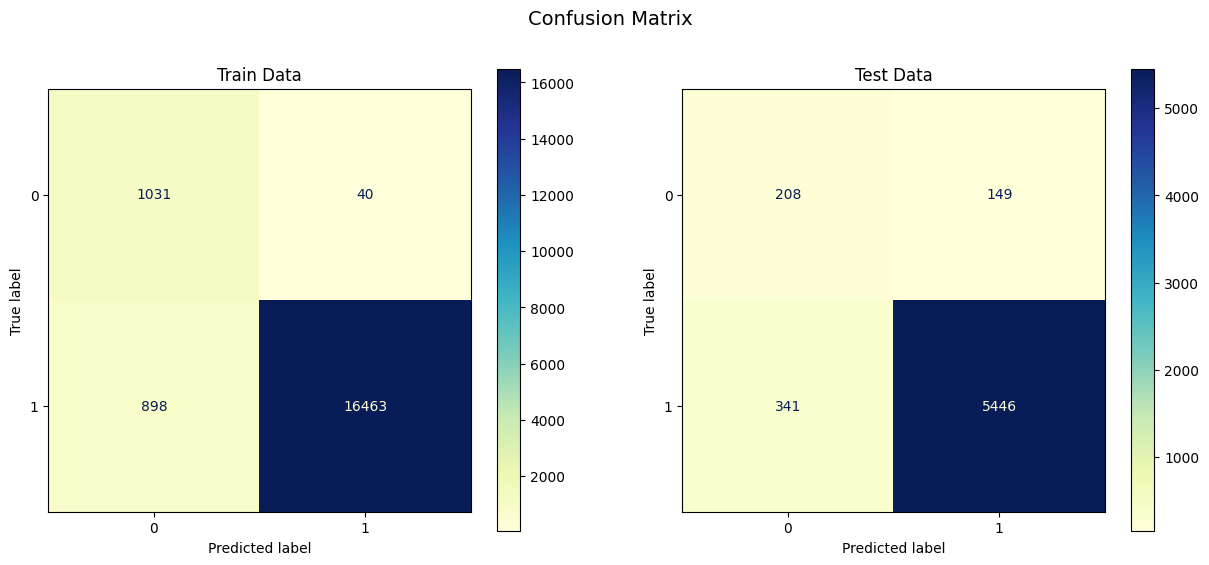

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Random forest classifier
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train) # Build a forest of trees from the training set (X, y).


# Predicting train and test labels
y_train_pred_count_clf = clf.predict(X_train) # Predict class for X train.

y_test_pred_count_clf = clf.predict(X_test) # Predict class for X test.

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator=clf, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()

In [79]:
print('Accuracy score for test data using Random Forest Classifier is:', accuracy_score(y_test,y_test_pred_count_clf))


Accuracy score for test data using Random Forest Classifier is: 0.9202473958333334


In [80]:
# Generating classification report of Random Forest classifier
train_report_clf = classification_report(y_train, y_train_pred_count_clf)
test_report_clf = classification_report(y_test, y_test_pred_count_clf)
print('                    Train Data Report          ')
print(train_report_clf)
print('                    Test  Data Report           ')
print(test_report_clf)

                    Train Data Report          
              precision    recall  f1-score   support

           0       0.53      0.96      0.69      1071
           1       1.00      0.95      0.97     17361

    accuracy                           0.95     18432
   macro avg       0.77      0.96      0.83     18432
weighted avg       0.97      0.95      0.96     18432

                    Test  Data Report           
              precision    recall  f1-score   support

           0       0.38      0.58      0.46       357
           1       0.97      0.94      0.96      5787

    accuracy                           0.92      6144
   macro avg       0.68      0.76      0.71      6144
weighted avg       0.94      0.92      0.93      6144



**XGBoost Classifier**

XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.



[08:46:52] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "class_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


0.9432508680555556
0.9425455729166666


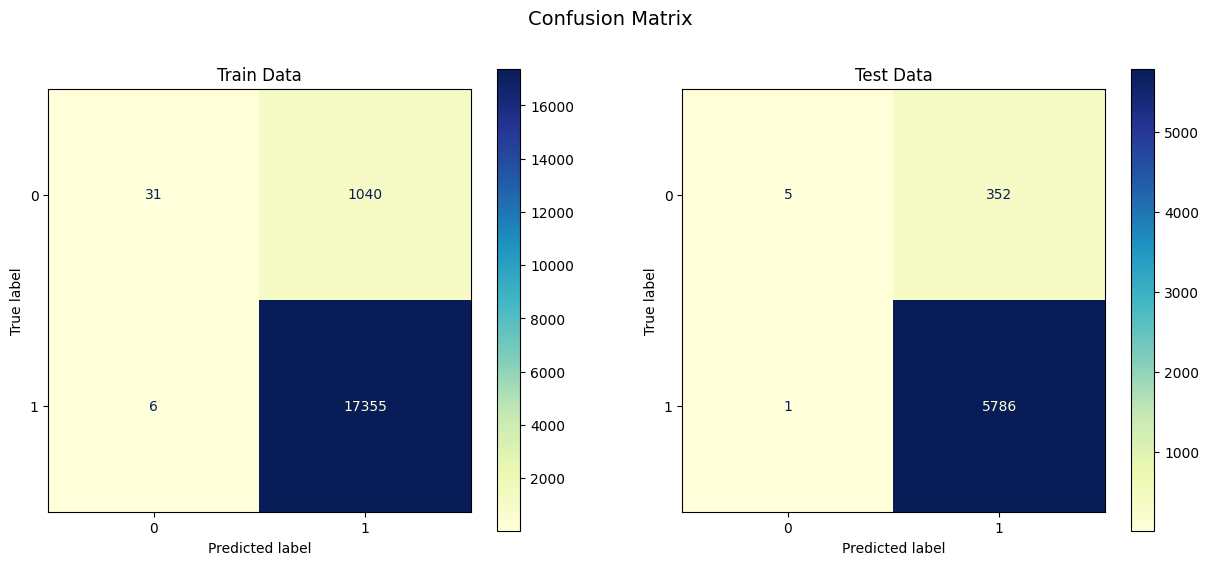

In [110]:
#XGBoost Classifier
from xgboost import XGBClassifier,XGBRFClassifier

XG = XGBRFClassifier(random_state=42,class_weight='balanced',n_estimators=23)  #creating xgboost classification model
XG.fit(X_train,y_train)
XG_Train = XG.predict(X_train)           # Predict class for X train.
XG_Test = XG.predict(X_test)             # Predict class for X test.
print(accuracy_score(y_train,XG_Train))
print(accuracy_score(y_test,XG_Test))

# Confusion Matrix
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 6))
plot_confusion_matrix(estimator=XG, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=XG, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=12)
ax2.set_title(label='Test Data', size=12)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=14)
plt.show()

In [100]:
print('Accuracy score for test data using XGBoost classifier is:', accuracy_score(y_test,XG_Test))


Accuracy score for test data using XGBoost classifier is: 0.9425455729166666


In [101]:
# Generating classification report of XGBoost classifier
train_report_xg = classification_report(y_train, XG_Train)
test_report_xg = classification_report(y_test, XG_Test)
print('                    Train Data Report          ')
print(train_report_xg)
print('                    Test  Data Report           ')
print(test_report_xg)

                    Train Data Report          
              precision    recall  f1-score   support

           0       0.84      0.03      0.06      1071
           1       0.94      1.00      0.97     17361

    accuracy                           0.94     18432
   macro avg       0.89      0.51      0.51     18432
weighted avg       0.94      0.94      0.92     18432

                    Test  Data Report           
              precision    recall  f1-score   support

           0       0.83      0.01      0.03       357
           1       0.94      1.00      0.97      5787

    accuracy                           0.94      6144
   macro avg       0.89      0.51      0.50      6144
weighted avg       0.94      0.94      0.92      6144



In [85]:
test_encoded=test.copy()

In [87]:
X=test_encoded.drop(['RESOURCE'],axis=1)


In [88]:
X[X.columns] = SS.transform(X)                 


In [102]:
prediction = XG.predict(X)  #applying the classifier to the test data


In [103]:
prediction


array([1, 1, 1, ..., 1, 1, 1])

In [104]:
Final = pd.DataFrame(test)


In [105]:
Final['Pred'] = prediction


In [111]:

output = pd.DataFrame({'Id': test_encoded.index,'label': prediction})
output.to_csv('Employee_Access_prediction_submission.csv', index=False, header=False)

### Observations

- Accuracy Score was used for model evaluation and prediction
- Accuracy score of models used :

| Model Name | Accuracy|
|------------|-------------|
| Logistic regression | 0.941 |
| Random Forest Classifier | 0.920 |
| XGBoost| 0.942 |